# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie Database contains metadata about movies ranging from cast, genre, to overall revenue and budgets.
In the data exploratory phase I will try to make sure I understand the data and all of the attributes. I will then identify any questions that I want to answer from all of this data. 
> In the data wrangling phase, I plan on making sure that the data is clean and ready to use for reporting purposes by eliminating duplicates or null values. I'll also need to learn how to handle multiple values in a single cell. 
> Then, I'll try to draw conclusions and communicate my findings on the data. 

> The questions I want to answer are:  
    1) Which genre of movies are most popular year to year?  
    2) Which genres have made the most money?  
    3) Which directors have made the most money?  
    4) How much have budgets and revenues changed year over year?  
    5) Which production companies are making the most money?   
    6) Which production companies have the highest popularity rating?  
    7) How is the popularity score distributed?  
    8) How is the release year distributed?  
    9) How is the average vote distributed?
    

In [1]:
# These are all of the packages that I will need to conduct the analysis
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>After loading the data, I want to take a look at the headers and make sure that the data is loading properly. This is to ensure I don't have to change the seperator.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

> Next, I want to check and make sure there aren't any null values in the dataset and also make sure that the data types are correct.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> There are quite a few null values in the dataset and it looks like I might have to change a few datatypes. The attribute names all look good so I don't have to rename any of the columns.

>I also want to make sure there are no duplicates.

In [4]:
sum(df.duplicated())

1

> I'll also need to figure out how to handle multiple values in a single cell delimited by a pipe. It seems like the Genre, Cast, Director, and Production Companies are ranked in order (i.e. ranked). So my questions will only focus on the rank 1 values of those columns and I'll ignore the rest for now. 

### Data Cleaning

> First, I'll drop the columns IMDB ID, Homepage, Tagline, Overview, and Keywords as those are not relevant to the questions that I want answered. After I drop the columns, I'll just verify that they are gone.


In [5]:
df.drop(['homepage','tagline','keywords', 'imdb_id','overview'], axis=1, inplace=True)
df.head() #verify

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

> Now, I'll focus on splitting out the rank 1 cast, genres, companies, and director into separate values by using the split function on the delimiter. Then, I'll put the values into a list  so that I can use that to populate a new column in the dataframe. I'll do this in a loop statement so that I can capture all of the columns at once. 

In [6]:
columns = ['cast','genres','production_companies', 'director'] #the columns I want to split

for c in columns:
    # split the values based on delimiter and put each value in their own columns
    x = df[c].str.split('|', expand=True)
    # only use the first value and store it in a list
    rank1 = x[0].values
    # create new columns in the dataframe with the column name appended with rank1 using the values in the above list
    df[c + '_rank1'] = rank1

df.info() # verify the columns were added

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
id                            10866 non-null int64
popularity                    10866 non-null float64
budget                        10866 non-null int64
revenue                       10866 non-null int64
original_title                10866 non-null object
cast                          10790 non-null object
director                      10822 non-null object
runtime                       10866 non-null int64
genres                        10843 non-null object
production_companies          9836 non-null object
release_date                  10866 non-null object
vote_count                    10866 non-null int64
vote_average                  10866 non-null float64
release_year                  10866 non-null int64
budget_adj                    10866 non-null float64
revenue_adj                   10866 non-null float64
cast_rank1                    10790 non-null object
genres_ran

> Now, I'll drop the columns that I split since I won't be using them anymore. I'll verify after dropping.

In [7]:
df.drop(['cast','genres','production_companies', 'director'],axis=1,inplace=True) #drop the columns I don't need
df.info() #verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                            10866 non-null int64
popularity                    10866 non-null float64
budget                        10866 non-null int64
revenue                       10866 non-null int64
original_title                10866 non-null object
runtime                       10866 non-null int64
release_date                  10866 non-null object
vote_count                    10866 non-null int64
vote_average                  10866 non-null float64
release_year                  10866 non-null int64
budget_adj                    10866 non-null float64
revenue_adj                   10866 non-null float64
cast_rank1                    10790 non-null object
genres_rank1                  10843 non-null object
production_companies_rank1    9836 non-null object
director_rank1                10822 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


> I want to check the duplicate to ensure it can be dropped then I'll drop the duplicate.

In [8]:
df[df.duplicated(keep=False)] #get the duplicated rows

id  popularity    budget  revenue original_title  runtime  \
2089  42194     0.59643  30000000   967000         TEKKEN       92   
2090  42194     0.59643  30000000   967000         TEKKEN       92   

     release_date  vote_count  vote_average  release_year  budget_adj  \
2089      3/20/10         110           5.0          2010  30000000.0   
2090      3/20/10         110           5.0          2010  30000000.0   

      revenue_adj cast_rank1 genres_rank1 production_companies_rank1  \
2089     967000.0    Jon Foo        Crime                      Namco   
2090     967000.0    Jon Foo        Crime                      Namco   

        director_rank1  
2089  Dwight H. Little  
2090  Dwight H. Little

> Looks like it is a duplicate so I'll go ahead and remove drop the duplicate then verify it was removed. 

In [9]:
df.drop_duplicates(inplace=True) #drop the duplicates
sum(df.duplicated()) # verify duplicates are removed

0

> Finally, I'll drop the null rows and verify. I know there are still a lot of missing values for some fields like Director, Companies, and Cast but I want to perform analysis on those fields so I want to include them for now. 

In [10]:
df.dropna(inplace=True) #drop the null values
df.info() #verify all the null rows are removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
id                            9772 non-null int64
popularity                    9772 non-null float64
budget                        9772 non-null int64
revenue                       9772 non-null int64
original_title                9772 non-null object
runtime                       9772 non-null int64
release_date                  9772 non-null object
vote_count                    9772 non-null int64
vote_average                  9772 non-null float64
release_year                  9772 non-null int64
budget_adj                    9772 non-null float64
revenue_adj                   9772 non-null float64
cast_rank1                    9772 non-null object
genres_rank1                  9772 non-null object
production_companies_rank1    9772 non-null object
director_rank1                9772 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genre of movies are most popular year to year? 

> The first thing I want to do is group by the new genre column I created. Then, I want to find the average popularity score and plot it as a bar graph. 

Text(0, 0.5, 'Average Popularity Score')

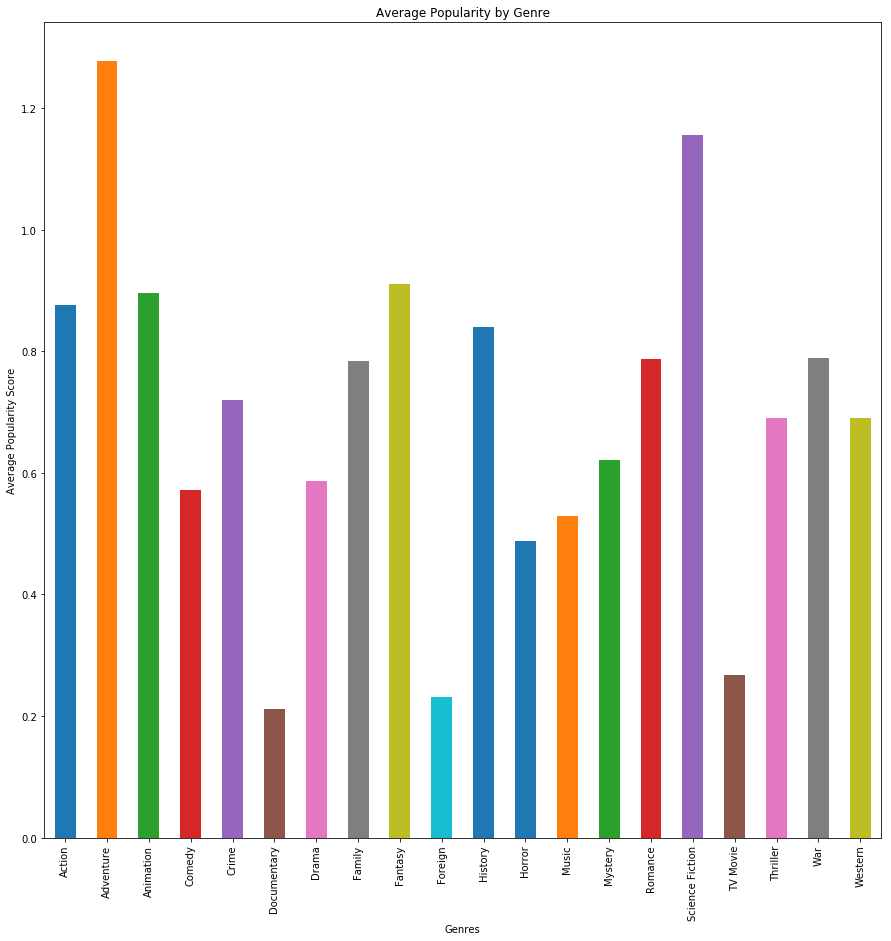

In [11]:
#Group by the new genre column and get the mean for popularity and plot it as a bar graph. 
df.groupby('genres_rank1')['popularity'].mean().plot(kind='bar', title = 'Average Popularity by Genre', figsize = (15,15)) #update the title and figure size of the graph
plt.xlabel('Genres') #change the x axis label
plt.ylabel('Average Popularity Score') #change the y axis label

> The above graph shows that Adventure and Science Fiction are the two most popular genres. I also want to know what the average popularity score was for those two genres year over year to see how they compared. First, I'll create a new data frame for both genres by using query.

In [12]:
df_adventure = df.query('genres_rank1=="Adventure"') #create a new data frame for Adventure genres
df_scifi = df.query('genres_rank1=="Science Fiction"') #create a new data frame for SciFi genres

> Then, I'll get the average popularity score grouped by Release Year and create another dataframe.

In [13]:
df_a2 = df_adventure.groupby('release_year')['popularity'].mean().reset_index() #get the average popularity score for adventure movies and create a new data frame
df_s2 = df_scifi.groupby('release_year')['popularity'].mean().reset_index() #get the average popularity score for sci-fi movies and create a new data frame

> Finally, I'll merge the two data frames using an inner join and make sure that the Release Year is used as the index. Then, I'll rename the columns before plotting the graph.

In [14]:
#merge the two new dataframes based on the primary key of release year from both dataframes. 
df_merged = df_a2.merge(df_s2, left_on='release_year', right_on ='release_year', how='inner').set_index('release_year') #inner join so that the same values for each year are shown next to each other
df_merged.rename(columns={'popularity_x':'adventure', 'popularity_y':'scifi'},inplace=True) #renaming the columns

> I'll plot the graph using a bar chart so that I can see the breakdown year over year of the average popularity score for these two genres.

Text(0, 0.5, 'Average Popularity Score')

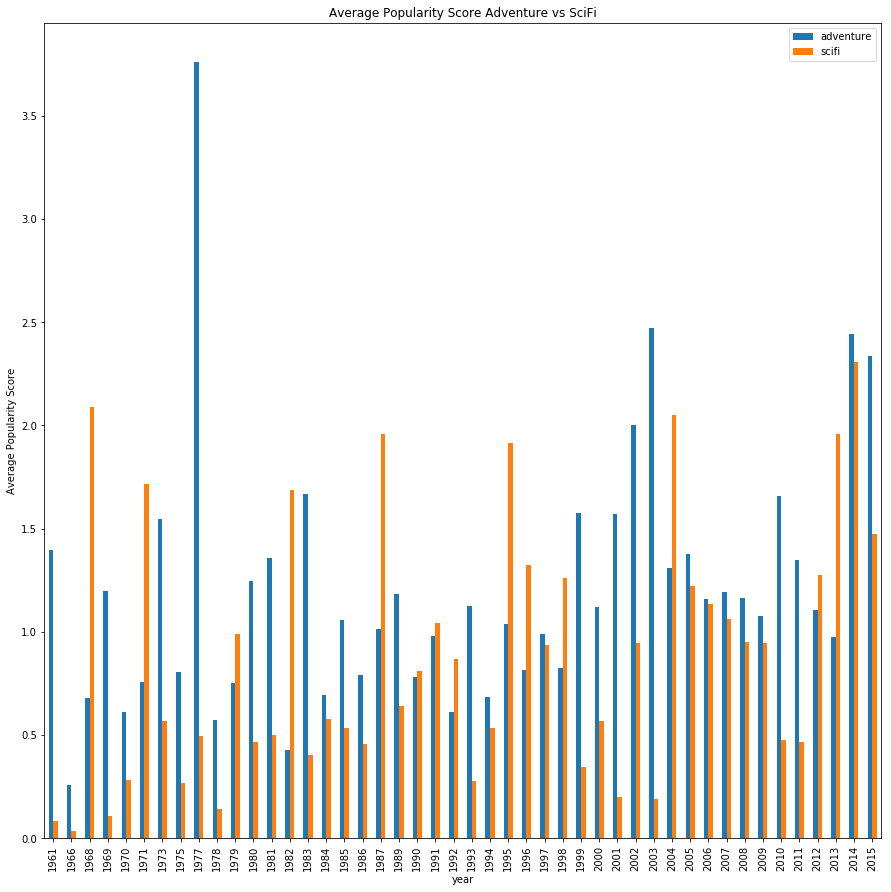

In [15]:
df_merged.plot(kind='bar', title = 'Average Popularity Score Adventure vs SciFi', figsize = (15,15)) #plot the data using a bar graph and update the title.
plt.xlabel('year') #change the x-axis label 
plt.ylabel('Average Popularity Score') #change the y-axis label

> The graph is a bit crowded and it might have been better if I used a smaller timeframe.

### Research Question 2: Which genres have made the most money?

> Similar to the graph above, I want to group by genres but this time I want to find the average revenue for each genre. 

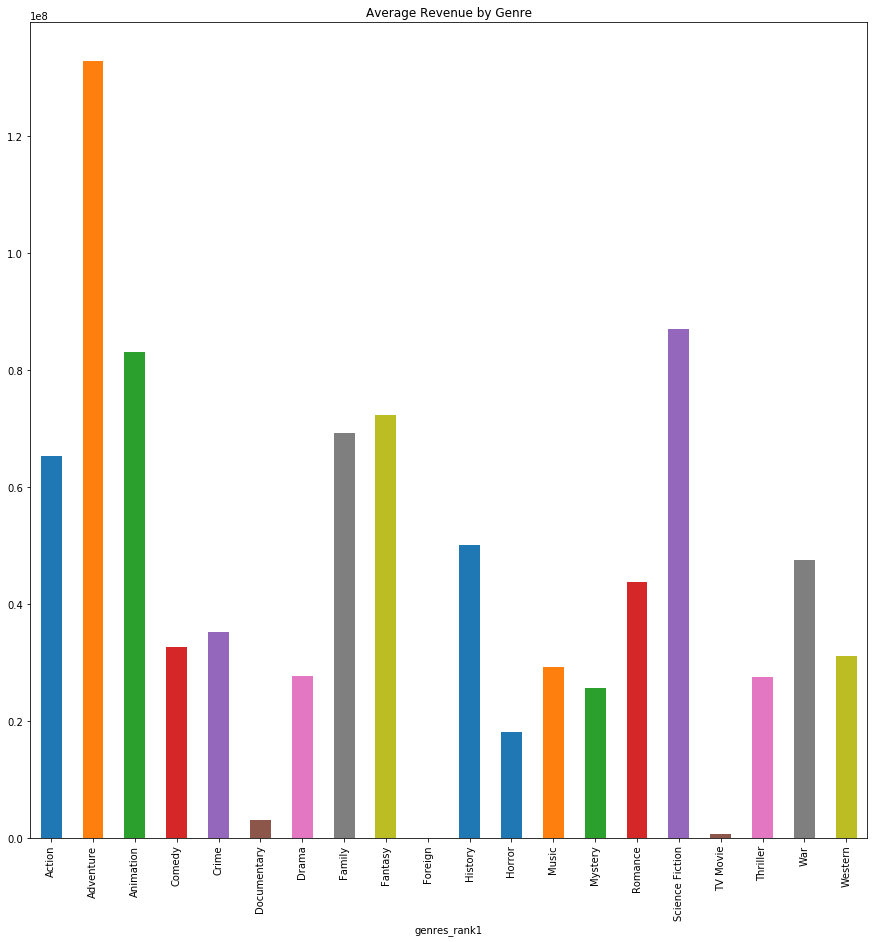

In [16]:
#group by genre and get the average for the revenue then plot it as a bar graph.
ax = df.groupby('genres_rank1')['revenue'].mean().plot(kind='bar', title = 'Average Revenue by Genre', figsize = (15,15))

> The y-axis should be in dollars so I'll need to format it so that it shows properly. After researching online, I found a way to display it correctly using matplotlibs formatter. I'll also make sure the labels are properly added.

[]

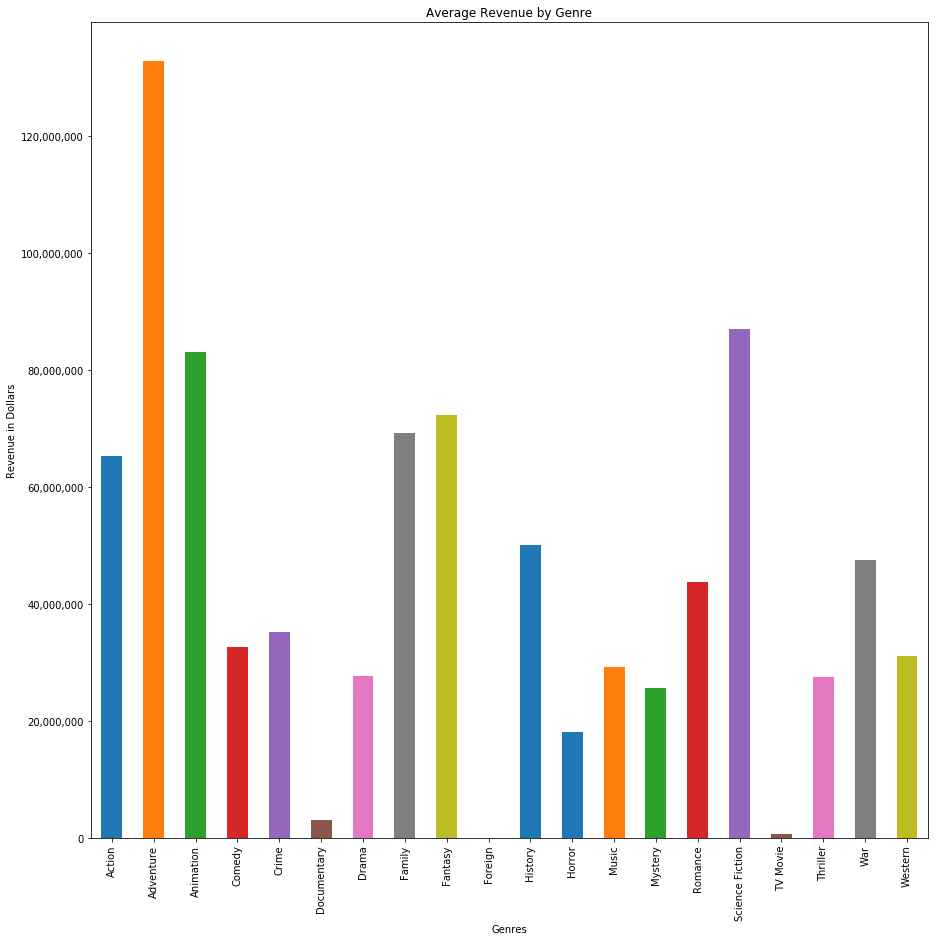

In [17]:
ax = df.groupby('genres_rank1')['revenue'].mean().plot(kind='bar', title = 'Average Revenue by Genre', figsize = (15,15)) #create a variable for plotting the data so that I can update the y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #changing the format of the y-axis so that it shows the entire value and is comma separated at the thousand
plt.xlabel('Genres') #change the x-axis label
plt.ylabel('Revenue in Dollars') #change the y-axis label
ax.plot() #plot the graph

### Research Question 3: Which directors have made the most money for adventure movies?

> After exploring the data, it would be difficult to group by all directors as there are many unique values. So, I decided to focus on adventure genres that have made more than 800 million dollars. I did this by using two query statements.

In [18]:
df_adventure = df.query('genres_rank1 =="Adventure"') #query all Adventure movies
df_bigmoney = df_adventure.query('revenue > 800000000') #query all adventure movies with revenue greater than 800 million

> Next, I'll group by the directors and get the average revenue and plot it as a bar graph with all of the labels correctly populated. 

[]

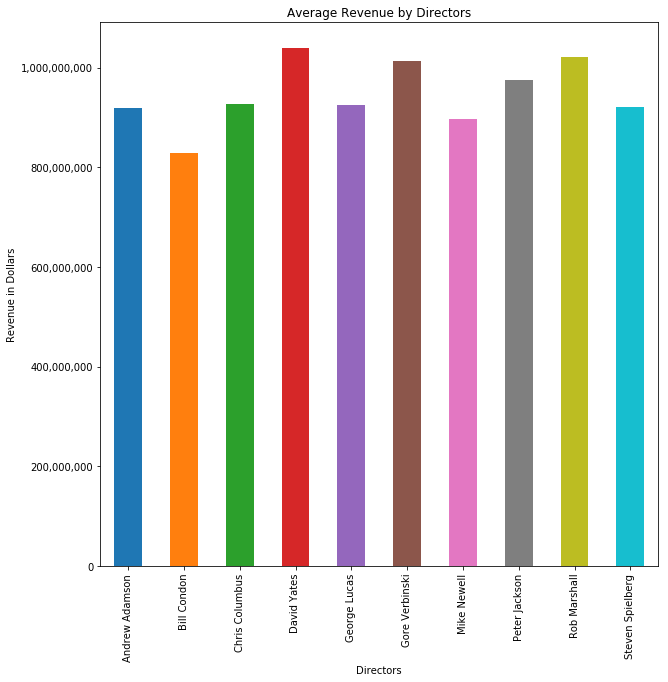

In [19]:
ax = df_bigmoney.groupby('director_rank1')['revenue'].mean().plot(kind='bar', title = 'Average Revenue by Directors', figsize = (10,10)) #create a variable for plotting the data so that I can update the y-axis

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #changing the format of the y-axis so that it shows the entire value and is comma separated at the thousand
plt.xlabel('Directors') #change the x-axis label
plt.ylabel('Revenue in Dollars') #change the y-axis label
ax.plot() #plot the graph

### Research Question 4: How much have budgets and revenues changed year over year?

> I want to plot budgets and revenues on a single graph so that we can easily see how they are correlated. To do this, I did another groupby statement but this time I found the average of budget and revenue. 

In [20]:
df_budget = df.groupby('release_year')['budget','revenue'].mean() #group by release year and get the average for budget and revenue

> Then, I plotted both of those averages on a single graph using the same methods as above. 

[]

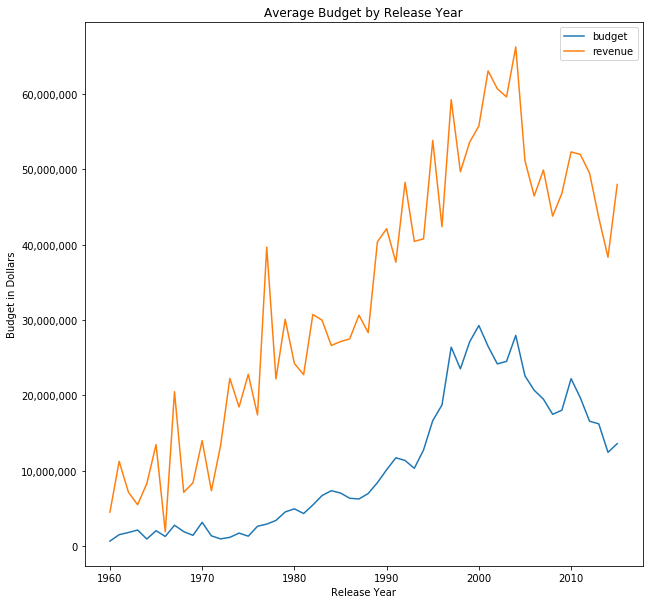

In [21]:
ax = df_budget.plot(kind='line', title = 'Average Budget by Release Year', figsize = (10,10)) #create a variable for plotting the data so that I can update the y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #changing the format of the y-axis so that it shows the entire value and is comma separated at the thousand
plt.xlabel('Release Year') #change the x-axis 
plt.ylabel('Budget in Dollars') #change the y-axis
ax.plot() #plot the graph

### Research Question 5: Which production companies have made the most money?

> After looking through the data, there were too many unique production company values. So, I decided to focus on the companies that made 600 million dollars or more on a single movie. I found the average revenue for those companies and plotted them using a bar graph.

[]

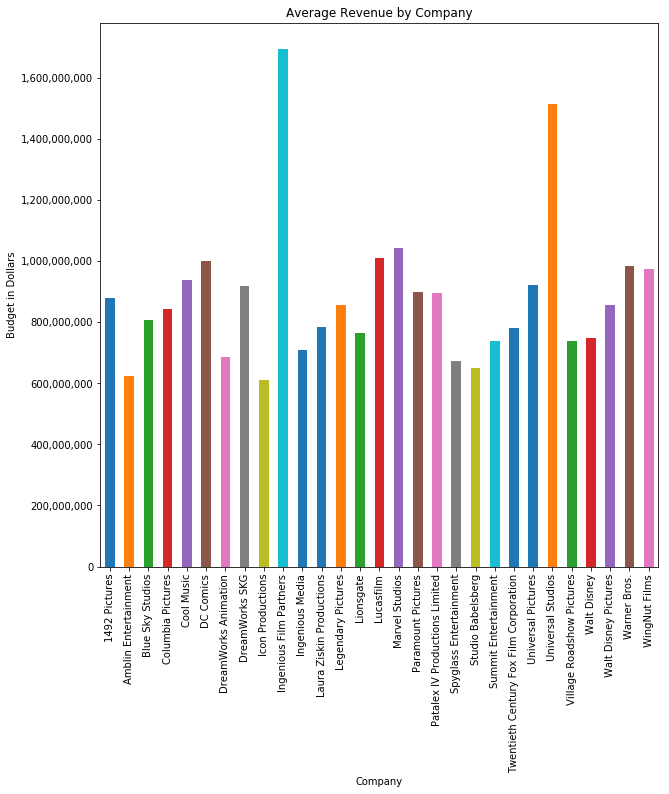

In [22]:
df_bigmoney = df.query('revenue > 600000000') #get the list of movies that have made over 600 million
df_company = df_bigmoney.groupby('production_companies_rank1')['revenue'].mean() #group by production companies that have made over 600 million on a film and get the average revenue

ax = df_company.plot(kind='bar', title = 'Average Revenue by Company', figsize = (10,10)) #create a variable for plotting the data so that I can update the y-axis

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #changing the format of the y-axis so that it shows the entire value and is comma separated at the thousand
plt.xlabel('Company') #change the x-axis
plt.ylabel('Budget in Dollars') #change the y-axis
ax.plot() #plot the graph

### Research Question 6: Which production companies are the most popular?

> After looking through the data, I needed to find a way to limit the number of production companies again based on popularity score. I used describe to find the maximum value (around 30) and I took 1/3 of that value (some arbitrary number I picked) to limit the number of production companies. Then, I plotted the results to see which companies received the highest ratings. 

Text(0, 0.5, 'Average Popularity Score')

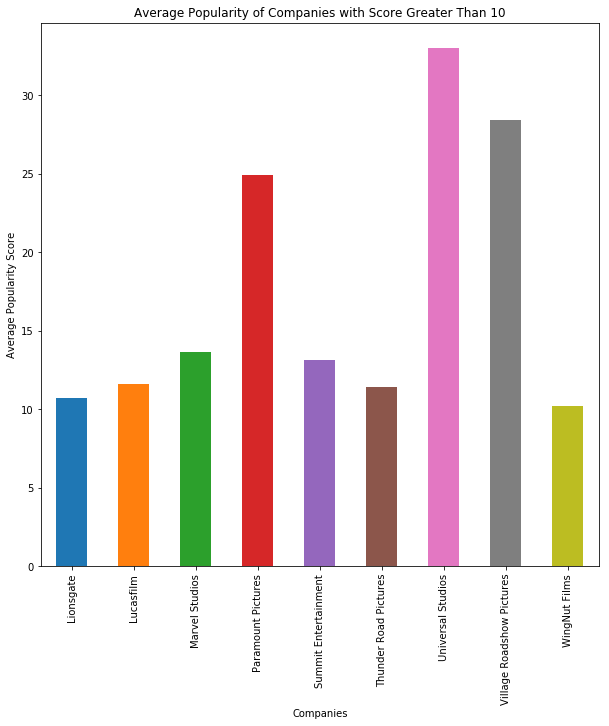

In [23]:
df_popular = df.query('popularity>10') # get the list of movies that have a popularity score of greater than 10
df_popular.groupby('production_companies_rank1')['popularity'].mean().plot(kind='bar', title = 'Average Popularity of Companies with Score Greater Than 10', figsize = (10,10)) #group by production companies and get the average popularity score then plot it as a bar graph
plt.xlabel('Companies') #change the x-axis
plt.ylabel('Average Popularity Score') #change the y-axis

### Question #7: How is the popularity score distributed?

> I want to plot a histogram of the popularity score to look at the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d031c50>]],
      dtype=object)

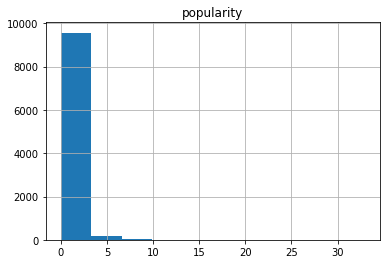

In [24]:
df.hist('popularity') #plot a histogram on popularity

### Question #8: How is the release year distributed?

> I want to see how the release years are distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fbc2198>]],
      dtype=object)

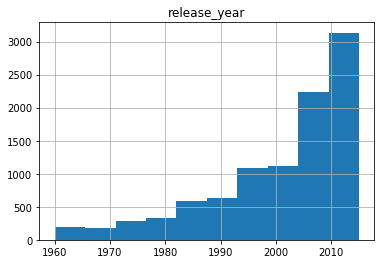

In [25]:
df.hist('release_year') #plot a histogram on release year

### Question #9: How is the vote average distributed?

> I want to see how the vote average is distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d0172b0>]],
      dtype=object)

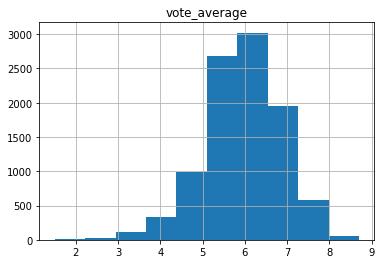

In [26]:
df.hist('vote_average') #plot a histogram on vote average

> I want to understand if there were any erroneous values with revenue

In [27]:
df['revenue'].describe() #use describe for useful stats

count    9.772000e+03
mean     4.423121e+07
std      1.225889e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.104729e+07
max      2.781506e+09
Name: revenue, dtype: float64

> I want to understand if there were any erroneous values with budget

In [28]:
df['budget'].describe() #use describe for useful stats

count    9.772000e+03
mean     1.617967e+07
std      3.221074e+07
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+05
75%      1.928750e+07
max      4.250000e+08
Name: budget, dtype: float64

In [29]:
#get the count of movies where revenue is zero, where budget is zero, and where runtime is zero
df.query('revenue == 0').count()['id'], df.query('budget == 0').count()['id'], df.query('runtime == 0').count()['id']

(5022, 4751, 13)

In [30]:
df.describe() #use describte to get useful stats on all attributes

id   popularity        budget       revenue      runtime  \
count    9772.000000  9772.000000  9.772000e+03  9.772000e+03  9772.000000   
mean    63189.640810     0.694721  1.617967e+07  4.423121e+07   102.926627   
std     90718.059987     1.036931  3.221074e+07  1.225889e+08    27.877432   
min         5.000000     0.000188  0.000000e+00  0.000000e+00     0.000000   
25%     10221.500000     0.232710  0.000000e+00  0.000000e+00    90.000000   
50%     18677.500000     0.419762  2.000000e+05  0.000000e+00   100.000000   
75%     70577.250000     0.776408  1.928750e+07  3.104729e+07   112.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   877.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  9772.000000   9772.000000   9772.000000  9.772000e+03  9.772000e+03  
mean    239.312014      5.963528   2000.878428  1.941599e+07  5.705309e+07  
std     603.011504      0.913174     13.036794  3.566634e+07  1.514499e+08  
min      10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%      18.000000      5.400000   1994.000000  0.000000e+00  0.000000e+00  
50%      46.000000      6.000000   2005.000000  3.061342e+05  0.000000e+00  
75%     173.000000      6.600000   2011.000000  2.464268e+07  4.311848e+07  
max    9767.000000      8.700000   2015.000000  4.250000e+08  2.827124e+09

<a id='conclusions'></a>
## Conclusions

The following conclusions have been made about the TMDb movie dataset:
1. Adventure and Science Fiction dominated the most popular genres. I also wanted to check how the popularity scores varied year over year for the two genres.
2. Not surprisingly, the two genres also made the most money. However, the average amount of money that Adventure made was far greater.
3. I was surprised to see David Yates as the director that made the most money for Adventure movies that made over 800 million dollars.
4. Budget and Revenue seem to be highly correlated and as revenues started to decline starting around the year 2000, so did the budgets on films.
5. I was also surprised to see Ingenious Film Partners as the the production company that averaged the most money for movies that made over 600 million dollars.
6. For the movies that had a popularity score fo 10 or greater, Universal averaged the highest popularity score which is not that surprising since they averaged the second highest in revenues.


### Limitations with the Data

7. Looking at the distribution of popularity score, which is skewed right, I probably should have chosen vote average to determine, which is normall distrbuted, to determine how popular movies were.
8. There are a lot of values with zero in budget, revenue, and runtime which probably skewed the averages and might not have been the best attributes to use in my analysis.